In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# Architecture hyperparameter grid search plot
Here the results from the architecture hyperparameter search for the single GSM dataset are shown.

In [10]:
df = pd.read_csv("alh_emb_lay.csv")

df['divergence_loss'] -= df['n_emb'] / 2
df['loss'] = df['divergence_loss'] + df['reconstruction_loss']

df['test_divergence_loss'] -= df['n_emb'] / 2
df['test_loss'] = df['test_divergence_loss'] + df['test_reconstruction_loss']

# Some of the data is dropeed from the plot, specifically when the n_lay=2 we aren't using non-linearity and it didn't seem fit to include this in the comparison with
# the standard neural networks.
df.drop(index=df[df['n_lay'] == 2].index, inplace=True)

df

,epoch,loss,reconstruction_loss,divergence_loss,stoicheometry_loss,test_loss,test_reconstruction_loss,test_divergence_loss,test_stoicheometry_loss,epochs,...,refresh_data_on,save_losses_on,test_dataset,test_size,save_test_min,weight_decay,beta_S,main_folder,losses_file,run
32,0,3047.333250,3043.435654,3.897595,0.0,3119.546360,3115.586260,3.960100,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,1
33,1,2774.366191,2768.662509,5.703681,0.0,2902.580276,2897.134607,5.445669,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,1
34,2,2712.913408,2705.593259,7.320149,0.0,2859.714654,2852.990547,6.724108,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,1
35,3,2664.999669,2657.122545,7.877124,0.0,2822.766840,2815.557885,7.208956,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,1
36,4,2628.953583,2620.682975,8.270609,0.0,2794.252092,2786.787216,7.464876,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,27,1251.016577,1233.594470,17.422107,0.0,2361.590789,2352.435449,9.155340,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,62
2012,28,1234.004860,1216.493894,17.510966,0.0,2373.324822,2364.262961,9.061860,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,62
2013,29,1221.579371,1203.833839,17.745532,0.0,2386.265794,2377.174798,9.090996,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,62
2014,30,1211.818573,1193.818782,17.999791,0.0,2398.436601,2389.133090,9.303511,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,62


In [11]:
n_emb_values = sorted(df['n_emb'].unique())
n_lay_values = sorted(df['n_lay'].unique())

n_n_emb = len(n_emb_values)
n_n_lay = len(n_lay_values)

In [12]:
def get_emb_lay_val(col, min_on='test_loss'):
    A = np.zeros((n_n_emb, n_n_lay))
    for i, n_emb in enumerate(n_emb_values):
        i_df = df[df['n_emb'] == n_emb]
        for j, n_lay in enumerate(n_lay_values):
            ij_df = i_df[i_df['n_lay'] == n_lay]

            if len(ij_df) > 0:
                A[i,j] = float(ij_df.iloc[ij_df[min_on].argmin()][col])

    return A

In [13]:
test_l = get_emb_lay_val('test_loss')
test_dl= get_emb_lay_val('test_divergence_loss')
loss = get_emb_lay_val('loss', min_on='loss')
loss_d = get_emb_lay_val('divergence_loss', min_on='loss')

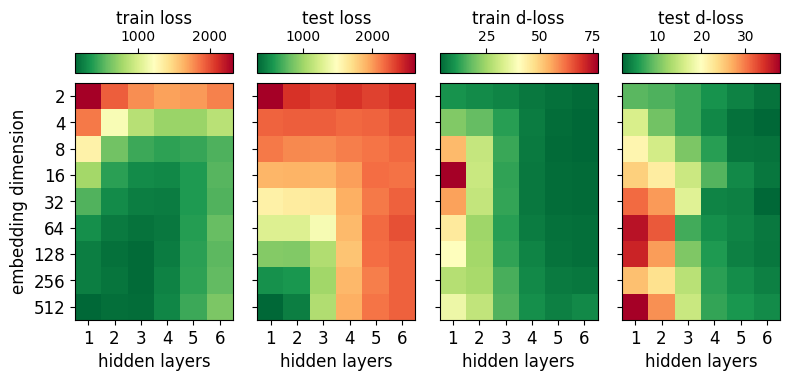

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8,4))

fontsize=12

def plot(ax, vals, name, add_y_ticks=True):    
    im = ax.imshow(vals, cmap='RdYlGn_r')

    loc = make_axes_locatable(ax)
    cax = loc.append_axes('top', 0.2, 0.1)
    cbar = plt.colorbar(im, cax=cax, location='top')
    cbar.set_label(name, fontsize=fontsize)

    x = np.arange(n_n_lay)
    y = np.arange(n_n_emb)

    ax.set_xticks(x, np.array(n_lay_values) - 2, fontsize=fontsize)

    ax.set_yticks(y, n_emb_values if add_y_ticks else [], fontsize=fontsize)
    if add_y_ticks:
        ax.set_ylabel("embedding dimension", fontsize=fontsize)
    ax.set_xlabel("hidden layers", fontsize=fontsize)
    

plot(ax1, loss, "train loss")
plot(ax2, test_l, "test loss", False)
plot(ax3, loss_d, "train d-loss", False)
plot(ax4, test_dl, "test d-loss", False)

plt.subplots_adjust(wspace=0.1)

fig.tight_layout()
fig.savefig("./multi_gsm_emb_lay_grid.png", dpi=600)
